<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/QC%20-%20Part%20-%20A%20-%20Live%20Session/Live_Session_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Lecture - 06</font>

## Install Package

In [1]:
!pip uninstall qiskit qiskit-aer
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e4020364efcc8abcab7c3c5a1185da2b2674f18391a6e7788ac688faa3d409f9
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider.job import job_monitor
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile
import time

import numpy as np
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.result import marginal_counts

import random

## Binary Classification, VQC

In [4]:
def vqc(theta):
  qr = QuantumRegister(1)
  cr = ClassicalRegister(1)
  qc = QuantumCircuit(qr, cr)

  qc.h(qr[0])
  qc.ry(theta, qr[0])
  qc.measure(qr[0], cr[0])

  return qc

In [5]:
x = 0

theta = np.random.rand()
circuit = vqc(theta)

In [6]:
simulator = AerSimulator()
job = simulator.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 470, '1': 554}


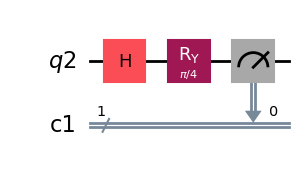

In [7]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

theta = np.pi / 4

qc.h(qr[0])
qc.ry(theta, qr[0])
qc.measure(qr[0], cr[0])

qc.draw('mpl')

## AlexNet MNIST

### For classical

#### Import *Library*

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

#### Model train

In [2]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=10):
    super(AlexNet, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(64, 192, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(192, 384, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
    )
    self.classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(384 * 7 * 7, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), 384 * 7 * 7)
    x = self.classifier(x)
    return x

In [3]:
def train(model, device, train_loader, optimizer, epoch):
  model.train()
  train_loss = 0

  for data, target in tqdm(train_loader, desc=f"Epoch {epoch}", unit="batch"):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  return train_loss / len(train_loader)

In [4]:
def test(model, device, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += F.cross_entropy(output, target, reduction='sum').item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [5]:
batch_size = 1000
test_batch_size = 1000
epochs = 1000
lr = 0.001
gamma = 0.7
no_cuda = False
patience = 10

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

train_loader = DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=False)

model = AlexNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=gamma)

best_test_acc = 0
epochs_no_improve = 0

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16085046.46it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 479229.08it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4444468.91it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11531797.08it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [6]:
for epoch in range(1, epochs + 1):
  train_loss = train(model, device, train_loader, optimizer, epoch)
  test_loss, test_accuracy = test(model, device, test_loader)
  print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

  if test_accuracy > best_test_acc:
    best_test_acc = test_accuracy
    torch.save(model.state_dict(), 'best_alexnet_model_mnist.pth')
    epochs_no_improve = 0
  else:
    epochs_no_improve += 1
    if epochs_no_improve == patience:
      print("Early stopping")
      break

  scheduler.step()

Epoch 1: 100%|██████████| 60/60 [00:27<00:00,  2.17batch/s]


Epoch: 1, Train Loss: 0.6600, Test Loss: 0.0762, Test Accuracy: 97.64%


Epoch 2: 100%|██████████| 60/60 [00:25<00:00,  2.33batch/s]


Epoch: 2, Train Loss: 0.0689, Test Loss: 0.0355, Test Accuracy: 98.82%


Epoch 3: 100%|██████████| 60/60 [00:27<00:00,  2.20batch/s]


Epoch: 3, Train Loss: 0.0470, Test Loss: 0.0289, Test Accuracy: 99.10%


Epoch 4: 100%|██████████| 60/60 [00:26<00:00,  2.30batch/s]


Epoch: 4, Train Loss: 0.0385, Test Loss: 0.0217, Test Accuracy: 99.25%


Epoch 5: 100%|██████████| 60/60 [00:25<00:00,  2.32batch/s]


Epoch: 5, Train Loss: 0.0314, Test Loss: 0.0205, Test Accuracy: 99.30%


Epoch 6: 100%|██████████| 60/60 [00:25<00:00,  2.32batch/s]


Epoch: 6, Train Loss: 0.0282, Test Loss: 0.0222, Test Accuracy: 99.20%


Epoch 7: 100%|██████████| 60/60 [00:25<00:00,  2.33batch/s]


Epoch: 7, Train Loss: 0.0249, Test Loss: 0.0241, Test Accuracy: 99.28%


Epoch 8: 100%|██████████| 60/60 [00:25<00:00,  2.34batch/s]


Epoch: 8, Train Loss: 0.0228, Test Loss: 0.0202, Test Accuracy: 99.35%


Epoch 9: 100%|██████████| 60/60 [00:25<00:00,  2.36batch/s]


Epoch: 9, Train Loss: 0.0193, Test Loss: 0.0218, Test Accuracy: 99.33%


Epoch 10: 100%|██████████| 60/60 [00:25<00:00,  2.33batch/s]


Epoch: 10, Train Loss: 0.0164, Test Loss: 0.0196, Test Accuracy: 99.37%


Epoch 11: 100%|██████████| 60/60 [00:25<00:00,  2.35batch/s]


Epoch: 11, Train Loss: 0.0148, Test Loss: 0.0261, Test Accuracy: 99.21%


Epoch 12: 100%|██████████| 60/60 [00:25<00:00,  2.36batch/s]


Epoch: 12, Train Loss: 0.0160, Test Loss: 0.0270, Test Accuracy: 99.12%


Epoch 13: 100%|██████████| 60/60 [00:25<00:00,  2.37batch/s]


Epoch: 13, Train Loss: 0.0131, Test Loss: 0.0225, Test Accuracy: 99.30%


Epoch 14: 100%|██████████| 60/60 [00:25<00:00,  2.38batch/s]


Epoch: 14, Train Loss: 0.0143, Test Loss: 0.0207, Test Accuracy: 99.40%


Epoch 15: 100%|██████████| 60/60 [00:25<00:00,  2.37batch/s]


Epoch: 15, Train Loss: 0.0129, Test Loss: 0.0182, Test Accuracy: 99.43%


Epoch 16: 100%|██████████| 60/60 [00:25<00:00,  2.34batch/s]


Epoch: 16, Train Loss: 0.0124, Test Loss: 0.0208, Test Accuracy: 99.43%


Epoch 17: 100%|██████████| 60/60 [00:25<00:00,  2.38batch/s]


Epoch: 17, Train Loss: 0.0104, Test Loss: 0.0219, Test Accuracy: 99.42%


Epoch 18: 100%|██████████| 60/60 [00:25<00:00,  2.37batch/s]


Epoch: 18, Train Loss: 0.0094, Test Loss: 0.0253, Test Accuracy: 99.36%


Epoch 19: 100%|██████████| 60/60 [00:25<00:00,  2.35batch/s]


Epoch: 19, Train Loss: 0.0113, Test Loss: 0.0230, Test Accuracy: 99.36%


Epoch 20: 100%|██████████| 60/60 [00:25<00:00,  2.34batch/s]


Epoch: 20, Train Loss: 0.0100, Test Loss: 0.0222, Test Accuracy: 99.30%


Epoch 21: 100%|██████████| 60/60 [00:25<00:00,  2.38batch/s]


Epoch: 21, Train Loss: 0.0100, Test Loss: 0.0260, Test Accuracy: 99.32%


Epoch 22: 100%|██████████| 60/60 [00:25<00:00,  2.36batch/s]


Epoch: 22, Train Loss: 0.0088, Test Loss: 0.0229, Test Accuracy: 99.43%


Epoch 23: 100%|██████████| 60/60 [00:25<00:00,  2.35batch/s]


Epoch: 23, Train Loss: 0.0093, Test Loss: 0.0250, Test Accuracy: 99.33%


Epoch 24: 100%|██████████| 60/60 [00:25<00:00,  2.39batch/s]


Epoch: 24, Train Loss: 0.0103, Test Loss: 0.0276, Test Accuracy: 99.21%


Epoch 25: 100%|██████████| 60/60 [00:25<00:00,  2.36batch/s]


Epoch: 25, Train Loss: 0.0085, Test Loss: 0.0257, Test Accuracy: 99.31%
Early stopping


In [7]:
model = AlexNet().to(device)
model.load_state_dict(torch.load('best_alexnet_model_mnist.pth'))
model.eval()

test_loader = DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

<ipython-input-7-6ff97cd26cd9>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_alexnet_model_mnist.pth'))


Accuracy of the network on the 10000 test images: 99.43%


### For Quantum

#### Import Library

In [8]:
!pip install torchquantum
!pip install qiskit-aer==0.13.0
!pip install qiskit-ibm-runtime==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pathos to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [31]:
import torchquantum as tq
import torchquantum.functional as tqf
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.circuit import Parameter
import numpy as np

#### Model Train

In [32]:
class QFCModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.n_wires = 4
    self.mesure = tq.MeasureAll(tq.PauliZ)

    self.encoder_gates = [tqf.rx] * 4 + [tqf.ry] * 4 + \
                         [tqf.rz] * 4 + [tqf.rx] * 4
    self.rx0 = tq.RX(has_params=True, trainable=True)
    self.ry0 = tq.RY(has_params=True, trainable=True)
    self.rz0 = tq.RZ(has_params=True, trainable=True)

    self.fc1 = nn.Linear(784, 4)
    self.fc = nn.Linear(4, 10)

  def forward(self, x):
    bsz = x.shape[0]
    x = x.view(-1, 784)
    x = self.fc1(x)

    qdev = tq.QuantumDevice(n_wires=self.n_wires, bsz=bsz, device=x.device)
    for k, gate in enumerate(self.encoder_gates):
      gate(qdev, wires=k % self.n_wires, params=x[:, k % self.n_wires])

    for i in range(self.n_wires):
      self.rx0(qdev, wires=i)
      self.ry0(qdev, wires=i)
      self.rz0(qdev, wires=i)

    x = self.mesure(qdev).reshape(bsz, -1)
    x = self.fc(x)
    return x

In [33]:
qc = QuantumCircuit(4)

rx_param = [Parameter(f'rx_{i}') for i in range(4)]
ry_param = [Parameter(f'ry_{i}') for i in range(4)]
rz_param = [Parameter(f'rz_{i}') for i in range(4)]

for i in range(4):
  qc.rx(rx_param[i], i)
for i in range(4):
  qc.ry(ry_param[i], i)
for i in range(4):
  qc.rz(rz_param[i], i)
for i in range(4):
  qc.rx(rx_param[i], i)

rx0_param = Parameter('rx0')
ry0_param = Parameter('ry0')
rz0_param = Parameter('rz0')

for i in range(4):
  qc.rx(rx0_param, i)
  qc.ry(ry0_param, i)
  qc.rz(rz0_param, i)

fig = qc.draw(output='mpl')
fig.savefig('4_qubit_quantum_circuit.pdf')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


In [34]:
def train(model, device, train_loader, optimizer, epoch):
  model.train()
  train_loss = 0

  for data, target in tqdm(train_loader, desc=f"Epoch {epoch}", unit="batch"):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  return train_loss / len(train_loader)

In [35]:
def test(model, device, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += F.cross_entropy(output, target, reduction='sum').item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [36]:
batch_size = 1000
test_batch_size = 1000
epochs = 1000
lr = 0.001
gamma = 0.7
no_cuda = False
patience = 10

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

train_loader = DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=False)

model = QFCModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=gamma)

best_test_acc = 0
epochs_no_improve = 0

In [37]:
for epoch in range(1, epochs + 1):
  train_loss = train(model, device, train_loader, optimizer, epoch)
  test_loss, test_accuracy = test(model, device, test_loader)
  print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

  if test_accuracy > best_test_acc:
    best_test_acc = test_accuracy
    torch.save(model.state_dict(), 'best_4qubit_model_mnist.pth')
    epochs_no_improve = 0
  else:
    epochs_no_improve += 1
    if epochs_no_improve == patience:
      print("Early stopping")
      break

  scheduler.step()

Epoch 1: 100%|██████████| 60/60 [00:14<00:00,  4.02batch/s]


Epoch: 1, Train Loss: 2.0331, Test Loss: 1.9099, Test Accuracy: 48.00%


Epoch 2: 100%|██████████| 60/60 [00:14<00:00,  4.22batch/s]


Epoch: 2, Train Loss: 1.8475, Test Loss: 1.7845, Test Accuracy: 53.51%


Epoch 3: 100%|██████████| 60/60 [00:13<00:00,  4.54batch/s]


Epoch: 3, Train Loss: 1.7378, Test Loss: 1.6873, Test Accuracy: 60.31%


Epoch 4: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 4, Train Loss: 1.6421, Test Loss: 1.6053, Test Accuracy: 62.68%


Epoch 5: 100%|██████████| 60/60 [00:13<00:00,  4.33batch/s]


Epoch: 5, Train Loss: 1.5600, Test Loss: 1.5183, Test Accuracy: 69.06%


Epoch 6: 100%|██████████| 60/60 [00:13<00:00,  4.51batch/s]


Epoch: 6, Train Loss: 1.4820, Test Loss: 1.4436, Test Accuracy: 70.99%


Epoch 7: 100%|██████████| 60/60 [00:13<00:00,  4.48batch/s]


Epoch: 7, Train Loss: 1.4162, Test Loss: 1.3859, Test Accuracy: 70.89%


Epoch 8: 100%|██████████| 60/60 [00:13<00:00,  4.49batch/s]


Epoch: 8, Train Loss: 1.3563, Test Loss: 1.3296, Test Accuracy: 72.50%


Epoch 9: 100%|██████████| 60/60 [00:13<00:00,  4.30batch/s]


Epoch: 9, Train Loss: 1.3037, Test Loss: 1.2778, Test Accuracy: 73.61%


Epoch 10: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 10, Train Loss: 1.2544, Test Loss: 1.2318, Test Accuracy: 74.49%


Epoch 11: 100%|██████████| 60/60 [00:13<00:00,  4.38batch/s]


Epoch: 11, Train Loss: 1.2077, Test Loss: 1.1797, Test Accuracy: 75.89%


Epoch 12: 100%|██████████| 60/60 [00:13<00:00,  4.49batch/s]


Epoch: 12, Train Loss: 1.1678, Test Loss: 1.1472, Test Accuracy: 74.94%


Epoch 13: 100%|██████████| 60/60 [00:14<00:00,  4.07batch/s]


Epoch: 13, Train Loss: 1.1281, Test Loss: 1.1158, Test Accuracy: 75.88%


Epoch 14: 100%|██████████| 60/60 [00:13<00:00,  4.48batch/s]


Epoch: 14, Train Loss: 1.0929, Test Loss: 1.0710, Test Accuracy: 76.41%


Epoch 15: 100%|██████████| 60/60 [00:13<00:00,  4.50batch/s]


Epoch: 15, Train Loss: 1.0644, Test Loss: 1.0402, Test Accuracy: 76.71%


Epoch 16: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 16, Train Loss: 1.0293, Test Loss: 1.0090, Test Accuracy: 77.98%


Epoch 17: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 17, Train Loss: 1.0050, Test Loss: 0.9838, Test Accuracy: 78.32%


Epoch 18: 100%|██████████| 60/60 [00:13<00:00,  4.49batch/s]


Epoch: 18, Train Loss: 0.9810, Test Loss: 0.9638, Test Accuracy: 77.62%


Epoch 19: 100%|██████████| 60/60 [00:13<00:00,  4.48batch/s]


Epoch: 19, Train Loss: 0.9593, Test Loss: 0.9471, Test Accuracy: 78.22%


Epoch 20: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 20, Train Loss: 0.9366, Test Loss: 0.9163, Test Accuracy: 78.55%


Epoch 21: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 21, Train Loss: 0.9134, Test Loss: 0.8989, Test Accuracy: 78.39%


Epoch 22: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 22, Train Loss: 0.8955, Test Loss: 0.8835, Test Accuracy: 79.03%


Epoch 23: 100%|██████████| 60/60 [00:13<00:00,  4.49batch/s]


Epoch: 23, Train Loss: 0.8838, Test Loss: 0.8601, Test Accuracy: 79.51%


Epoch 24: 100%|██████████| 60/60 [00:13<00:00,  4.32batch/s]


Epoch: 24, Train Loss: 0.8681, Test Loss: 0.8558, Test Accuracy: 78.94%


Epoch 25: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 25, Train Loss: 0.8517, Test Loss: 0.8438, Test Accuracy: 79.22%


Epoch 26: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 26, Train Loss: 0.8427, Test Loss: 0.8366, Test Accuracy: 78.68%


Epoch 27: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 27, Train Loss: 0.8294, Test Loss: 0.8120, Test Accuracy: 79.68%


Epoch 28: 100%|██████████| 60/60 [00:14<00:00,  4.22batch/s]


Epoch: 28, Train Loss: 0.8181, Test Loss: 0.8156, Test Accuracy: 79.04%


Epoch 29: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 29, Train Loss: 0.8090, Test Loss: 0.7952, Test Accuracy: 79.99%


Epoch 30: 100%|██████████| 60/60 [00:13<00:00,  4.43batch/s]


Epoch: 30, Train Loss: 0.7949, Test Loss: 0.7834, Test Accuracy: 80.20%


Epoch 31: 100%|██████████| 60/60 [00:14<00:00,  4.27batch/s]


Epoch: 31, Train Loss: 0.7839, Test Loss: 0.7781, Test Accuracy: 80.01%


Epoch 32: 100%|██████████| 60/60 [00:14<00:00,  4.25batch/s]


Epoch: 32, Train Loss: 0.7800, Test Loss: 0.7659, Test Accuracy: 80.13%


Epoch 33: 100%|██████████| 60/60 [00:14<00:00,  4.27batch/s]


Epoch: 33, Train Loss: 0.7715, Test Loss: 0.7779, Test Accuracy: 79.22%


Epoch 34: 100%|██████████| 60/60 [00:13<00:00,  4.31batch/s]


Epoch: 34, Train Loss: 0.7626, Test Loss: 0.7658, Test Accuracy: 79.82%


Epoch 35: 100%|██████████| 60/60 [00:14<00:00,  4.01batch/s]


Epoch: 35, Train Loss: 0.7521, Test Loss: 0.7488, Test Accuracy: 79.74%


Epoch 36: 100%|██████████| 60/60 [00:14<00:00,  4.16batch/s]


Epoch: 36, Train Loss: 0.7459, Test Loss: 0.7481, Test Accuracy: 79.78%


Epoch 37: 100%|██████████| 60/60 [00:14<00:00,  4.18batch/s]


Epoch: 37, Train Loss: 0.7390, Test Loss: 0.7387, Test Accuracy: 80.12%


Epoch 38: 100%|██████████| 60/60 [00:14<00:00,  4.18batch/s]


Epoch: 38, Train Loss: 0.7337, Test Loss: 0.7261, Test Accuracy: 80.22%


Epoch 39: 100%|██████████| 60/60 [00:13<00:00,  4.35batch/s]


Epoch: 39, Train Loss: 0.7276, Test Loss: 0.7243, Test Accuracy: 80.50%


Epoch 40: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 40, Train Loss: 0.7277, Test Loss: 0.7161, Test Accuracy: 80.68%


Epoch 41: 100%|██████████| 60/60 [00:14<00:00,  4.16batch/s]


Epoch: 41, Train Loss: 0.7150, Test Loss: 0.7131, Test Accuracy: 80.49%


Epoch 42: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 42, Train Loss: 0.7101, Test Loss: 0.7104, Test Accuracy: 80.26%


Epoch 43: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 43, Train Loss: 0.7056, Test Loss: 0.7013, Test Accuracy: 80.74%


Epoch 44: 100%|██████████| 60/60 [00:13<00:00,  4.43batch/s]


Epoch: 44, Train Loss: 0.7044, Test Loss: 0.7100, Test Accuracy: 80.26%


Epoch 45: 100%|██████████| 60/60 [00:13<00:00,  4.31batch/s]


Epoch: 45, Train Loss: 0.6976, Test Loss: 0.6994, Test Accuracy: 80.39%


Epoch 46: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 46, Train Loss: 0.6913, Test Loss: 0.6927, Test Accuracy: 80.41%


Epoch 47: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 47, Train Loss: 0.6900, Test Loss: 0.6879, Test Accuracy: 80.54%


Epoch 48: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 48, Train Loss: 0.6839, Test Loss: 0.6892, Test Accuracy: 80.59%


Epoch 49: 100%|██████████| 60/60 [00:14<00:00,  4.26batch/s]


Epoch: 49, Train Loss: 0.6886, Test Loss: 0.7227, Test Accuracy: 79.40%


Epoch 50: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 50, Train Loss: 0.6753, Test Loss: 0.6767, Test Accuracy: 80.77%


Epoch 51: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 51, Train Loss: 0.6751, Test Loss: 0.6828, Test Accuracy: 80.35%


Epoch 52: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 52, Train Loss: 0.6705, Test Loss: 0.6727, Test Accuracy: 80.79%


Epoch 53: 100%|██████████| 60/60 [00:13<00:00,  4.34batch/s]


Epoch: 53, Train Loss: 0.6737, Test Loss: 0.6680, Test Accuracy: 80.83%


Epoch 54: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 54, Train Loss: 0.6642, Test Loss: 0.6736, Test Accuracy: 80.07%


Epoch 55: 100%|██████████| 60/60 [00:13<00:00,  4.38batch/s]


Epoch: 55, Train Loss: 0.6666, Test Loss: 0.6646, Test Accuracy: 80.98%


Epoch 56: 100%|██████████| 60/60 [00:13<00:00,  4.37batch/s]


Epoch: 56, Train Loss: 0.6627, Test Loss: 0.6646, Test Accuracy: 81.01%


Epoch 57: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 57, Train Loss: 0.6562, Test Loss: 0.6671, Test Accuracy: 80.45%


Epoch 58: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 58, Train Loss: 0.6530, Test Loss: 0.6512, Test Accuracy: 80.80%


Epoch 59: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 59, Train Loss: 0.6509, Test Loss: 0.6623, Test Accuracy: 81.00%


Epoch 60: 100%|██████████| 60/60 [00:13<00:00,  4.30batch/s]


Epoch: 60, Train Loss: 0.6519, Test Loss: 0.6665, Test Accuracy: 80.90%


Epoch 61: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 61, Train Loss: 0.6488, Test Loss: 0.6541, Test Accuracy: 80.08%


Epoch 62: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 62, Train Loss: 0.6448, Test Loss: 0.6488, Test Accuracy: 80.96%


Epoch 63: 100%|██████████| 60/60 [00:13<00:00,  4.38batch/s]


Epoch: 63, Train Loss: 0.6471, Test Loss: 0.6510, Test Accuracy: 81.04%


Epoch 64: 100%|██████████| 60/60 [00:13<00:00,  4.31batch/s]


Epoch: 64, Train Loss: 0.6432, Test Loss: 0.6448, Test Accuracy: 81.05%


Epoch 65: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 65, Train Loss: 0.6465, Test Loss: 0.6508, Test Accuracy: 80.30%


Epoch 66: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 66, Train Loss: 0.6395, Test Loss: 0.6531, Test Accuracy: 80.06%


Epoch 67: 100%|██████████| 60/60 [00:13<00:00,  4.35batch/s]


Epoch: 67, Train Loss: 0.6342, Test Loss: 0.6467, Test Accuracy: 80.74%


Epoch 68: 100%|██████████| 60/60 [00:14<00:00,  4.27batch/s]


Epoch: 68, Train Loss: 0.6341, Test Loss: 0.6423, Test Accuracy: 81.22%


Epoch 69: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 69, Train Loss: 0.6379, Test Loss: 0.6384, Test Accuracy: 80.97%


Epoch 70: 100%|██████████| 60/60 [00:14<00:00,  4.17batch/s]


Epoch: 70, Train Loss: 0.6284, Test Loss: 0.6419, Test Accuracy: 81.05%


Epoch 71: 100%|██████████| 60/60 [00:13<00:00,  4.37batch/s]


Epoch: 71, Train Loss: 0.6292, Test Loss: 0.6342, Test Accuracy: 81.30%


Epoch 72: 100%|██████████| 60/60 [00:14<00:00,  4.22batch/s]


Epoch: 72, Train Loss: 0.6323, Test Loss: 0.6483, Test Accuracy: 80.18%


Epoch 73: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 73, Train Loss: 0.6300, Test Loss: 0.6350, Test Accuracy: 81.23%


Epoch 74: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 74, Train Loss: 0.6267, Test Loss: 0.6506, Test Accuracy: 80.60%


Epoch 75: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 75, Train Loss: 0.6263, Test Loss: 0.6313, Test Accuracy: 81.49%


Epoch 76: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 76, Train Loss: 0.6227, Test Loss: 0.6366, Test Accuracy: 81.03%


Epoch 77: 100%|██████████| 60/60 [00:13<00:00,  4.35batch/s]


Epoch: 77, Train Loss: 0.6243, Test Loss: 0.6302, Test Accuracy: 81.28%


Epoch 78: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 78, Train Loss: 0.6198, Test Loss: 0.6283, Test Accuracy: 80.97%


Epoch 79: 100%|██████████| 60/60 [00:13<00:00,  4.35batch/s]


Epoch: 79, Train Loss: 0.6188, Test Loss: 0.6558, Test Accuracy: 80.11%


Epoch 80: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 80, Train Loss: 0.6195, Test Loss: 0.6389, Test Accuracy: 81.29%


Epoch 81: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 81, Train Loss: 0.6164, Test Loss: 0.6209, Test Accuracy: 81.81%


Epoch 82: 100%|██████████| 60/60 [00:13<00:00,  4.43batch/s]


Epoch: 82, Train Loss: 0.6145, Test Loss: 0.6304, Test Accuracy: 81.20%


Epoch 83: 100%|██████████| 60/60 [00:14<00:00,  4.24batch/s]


Epoch: 83, Train Loss: 0.6132, Test Loss: 0.6263, Test Accuracy: 81.47%


Epoch 84: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 84, Train Loss: 0.6125, Test Loss: 0.6326, Test Accuracy: 81.38%


Epoch 85: 100%|██████████| 60/60 [00:14<00:00,  4.17batch/s]


Epoch: 85, Train Loss: 0.6139, Test Loss: 0.6201, Test Accuracy: 81.64%


Epoch 86: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 86, Train Loss: 0.6108, Test Loss: 0.6279, Test Accuracy: 81.06%


Epoch 87: 100%|██████████| 60/60 [00:13<00:00,  4.37batch/s]


Epoch: 87, Train Loss: 0.6090, Test Loss: 0.6320, Test Accuracy: 81.44%


Epoch 88: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 88, Train Loss: 0.6099, Test Loss: 0.6103, Test Accuracy: 82.16%


Epoch 89: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 89, Train Loss: 0.6072, Test Loss: 0.6272, Test Accuracy: 81.27%


Epoch 90: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 90, Train Loss: 0.6028, Test Loss: 0.6195, Test Accuracy: 81.26%


Epoch 91: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 91, Train Loss: 0.6089, Test Loss: 0.6263, Test Accuracy: 81.80%


Epoch 92: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 92, Train Loss: 0.6075, Test Loss: 0.6098, Test Accuracy: 82.38%


Epoch 93: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 93, Train Loss: 0.6040, Test Loss: 0.6088, Test Accuracy: 81.76%


Epoch 94: 100%|██████████| 60/60 [00:13<00:00,  4.30batch/s]


Epoch: 94, Train Loss: 0.6007, Test Loss: 0.6199, Test Accuracy: 81.59%


Epoch 95: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 95, Train Loss: 0.6038, Test Loss: 0.6236, Test Accuracy: 81.47%


Epoch 96: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 96, Train Loss: 0.6035, Test Loss: 0.6067, Test Accuracy: 81.92%


Epoch 97: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 97, Train Loss: 0.6016, Test Loss: 0.6089, Test Accuracy: 82.12%


Epoch 98: 100%|██████████| 60/60 [00:14<00:00,  4.24batch/s]


Epoch: 98, Train Loss: 0.6008, Test Loss: 0.6093, Test Accuracy: 82.07%


Epoch 99: 100%|██████████| 60/60 [00:14<00:00,  4.19batch/s]


Epoch: 99, Train Loss: 0.5980, Test Loss: 0.6305, Test Accuracy: 81.64%


Epoch 100: 100%|██████████| 60/60 [00:13<00:00,  4.51batch/s]


Epoch: 100, Train Loss: 0.5979, Test Loss: 0.6115, Test Accuracy: 81.95%


Epoch 101: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 101, Train Loss: 0.5837, Test Loss: 0.6023, Test Accuracy: 82.39%


Epoch 102: 100%|██████████| 60/60 [00:14<00:00,  4.20batch/s]


Epoch: 102, Train Loss: 0.5824, Test Loss: 0.6019, Test Accuracy: 82.15%


Epoch 103: 100%|██████████| 60/60 [00:13<00:00,  4.50batch/s]


Epoch: 103, Train Loss: 0.5836, Test Loss: 0.6019, Test Accuracy: 82.41%


Epoch 104: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 104, Train Loss: 0.5846, Test Loss: 0.6003, Test Accuracy: 82.59%


Epoch 105: 100%|██████████| 60/60 [00:13<00:00,  4.51batch/s]


Epoch: 105, Train Loss: 0.5849, Test Loss: 0.6005, Test Accuracy: 82.06%


Epoch 106: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 106, Train Loss: 0.5798, Test Loss: 0.6077, Test Accuracy: 82.46%


Epoch 107: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 107, Train Loss: 0.5793, Test Loss: 0.5964, Test Accuracy: 82.83%


Epoch 108: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 108, Train Loss: 0.5823, Test Loss: 0.6086, Test Accuracy: 81.87%


Epoch 109: 100%|██████████| 60/60 [00:13<00:00,  4.48batch/s]


Epoch: 109, Train Loss: 0.5811, Test Loss: 0.6014, Test Accuracy: 82.49%


Epoch 110: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 110, Train Loss: 0.5781, Test Loss: 0.5951, Test Accuracy: 82.52%


Epoch 111: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 111, Train Loss: 0.5755, Test Loss: 0.5989, Test Accuracy: 82.35%


Epoch 112: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 112, Train Loss: 0.5761, Test Loss: 0.6037, Test Accuracy: 82.14%


Epoch 113: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 113, Train Loss: 0.5763, Test Loss: 0.5979, Test Accuracy: 82.39%


Epoch 114: 100%|██████████| 60/60 [00:14<00:00,  4.26batch/s]


Epoch: 114, Train Loss: 0.5730, Test Loss: 0.5931, Test Accuracy: 82.65%


Epoch 115: 100%|██████████| 60/60 [00:13<00:00,  4.44batch/s]


Epoch: 115, Train Loss: 0.5798, Test Loss: 0.5958, Test Accuracy: 82.81%


Epoch 116: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 116, Train Loss: 0.5742, Test Loss: 0.5892, Test Accuracy: 82.91%


Epoch 117: 100%|██████████| 60/60 [00:13<00:00,  4.36batch/s]


Epoch: 117, Train Loss: 0.5716, Test Loss: 0.5890, Test Accuracy: 83.02%


Epoch 118: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 118, Train Loss: 0.5734, Test Loss: 0.5884, Test Accuracy: 82.89%


Epoch 119: 100%|██████████| 60/60 [00:13<00:00,  4.36batch/s]


Epoch: 119, Train Loss: 0.5758, Test Loss: 0.5907, Test Accuracy: 83.02%


Epoch 120: 100%|██████████| 60/60 [00:13<00:00,  4.43batch/s]


Epoch: 120, Train Loss: 0.5720, Test Loss: 0.5930, Test Accuracy: 82.52%


Epoch 121: 100%|██████████| 60/60 [00:13<00:00,  4.37batch/s]


Epoch: 121, Train Loss: 0.5667, Test Loss: 0.5854, Test Accuracy: 83.14%


Epoch 122: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 122, Train Loss: 0.5685, Test Loss: 0.5861, Test Accuracy: 83.01%


Epoch 123: 100%|██████████| 60/60 [00:13<00:00,  4.38batch/s]


Epoch: 123, Train Loss: 0.5721, Test Loss: 0.5922, Test Accuracy: 82.82%


Epoch 124: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 124, Train Loss: 0.5692, Test Loss: 0.5853, Test Accuracy: 83.04%


Epoch 125: 100%|██████████| 60/60 [00:14<00:00,  4.18batch/s]


Epoch: 125, Train Loss: 0.5751, Test Loss: 0.5995, Test Accuracy: 82.12%


Epoch 126: 100%|██████████| 60/60 [00:14<00:00,  4.05batch/s]


Epoch: 126, Train Loss: 0.5662, Test Loss: 0.5856, Test Accuracy: 83.23%


Epoch 127: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 127, Train Loss: 0.5688, Test Loss: 0.5894, Test Accuracy: 82.90%


Epoch 128: 100%|██████████| 60/60 [00:14<00:00,  4.25batch/s]


Epoch: 128, Train Loss: 0.5656, Test Loss: 0.5845, Test Accuracy: 83.07%


Epoch 129: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 129, Train Loss: 0.5644, Test Loss: 0.5823, Test Accuracy: 82.99%


Epoch 130: 100%|██████████| 60/60 [00:13<00:00,  4.43batch/s]


Epoch: 130, Train Loss: 0.5612, Test Loss: 0.5770, Test Accuracy: 83.68%


Epoch 131: 100%|██████████| 60/60 [00:13<00:00,  4.37batch/s]


Epoch: 131, Train Loss: 0.5579, Test Loss: 0.5841, Test Accuracy: 82.76%


Epoch 132: 100%|██████████| 60/60 [00:13<00:00,  4.29batch/s]


Epoch: 132, Train Loss: 0.5608, Test Loss: 0.5777, Test Accuracy: 83.07%


Epoch 133: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 133, Train Loss: 0.5602, Test Loss: 0.5776, Test Accuracy: 83.18%


Epoch 134: 100%|██████████| 60/60 [00:13<00:00,  4.30batch/s]


Epoch: 134, Train Loss: 0.5566, Test Loss: 0.5871, Test Accuracy: 83.04%


Epoch 135: 100%|██████████| 60/60 [00:13<00:00,  4.32batch/s]


Epoch: 135, Train Loss: 0.5593, Test Loss: 0.5795, Test Accuracy: 83.25%


Epoch 136: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 136, Train Loss: 0.5573, Test Loss: 0.5876, Test Accuracy: 83.07%


Epoch 137: 100%|██████████| 60/60 [00:13<00:00,  4.38batch/s]


Epoch: 137, Train Loss: 0.5614, Test Loss: 0.5670, Test Accuracy: 83.61%


Epoch 138: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 138, Train Loss: 0.5541, Test Loss: 0.5775, Test Accuracy: 83.26%


Epoch 139: 100%|██████████| 60/60 [00:14<00:00,  4.20batch/s]


Epoch: 139, Train Loss: 0.5501, Test Loss: 0.5834, Test Accuracy: 82.66%


Epoch 140: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 140, Train Loss: 0.5491, Test Loss: 0.5622, Test Accuracy: 84.00%


Epoch 141: 100%|██████████| 60/60 [00:13<00:00,  4.40batch/s]


Epoch: 141, Train Loss: 0.5444, Test Loss: 0.5558, Test Accuracy: 84.21%


Epoch 142: 100%|██████████| 60/60 [00:14<00:00,  4.13batch/s]


Epoch: 142, Train Loss: 0.5415, Test Loss: 0.5646, Test Accuracy: 83.76%


Epoch 143: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 143, Train Loss: 0.5451, Test Loss: 0.5564, Test Accuracy: 84.25%


Epoch 144: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 144, Train Loss: 0.5403, Test Loss: 0.5546, Test Accuracy: 84.01%


Epoch 145: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 145, Train Loss: 0.5401, Test Loss: 0.5597, Test Accuracy: 83.99%


Epoch 146: 100%|██████████| 60/60 [00:13<00:00,  4.35batch/s]


Epoch: 146, Train Loss: 0.5383, Test Loss: 0.5630, Test Accuracy: 83.67%


Epoch 147: 100%|██████████| 60/60 [00:13<00:00,  4.37batch/s]


Epoch: 147, Train Loss: 0.5376, Test Loss: 0.5620, Test Accuracy: 84.17%


Epoch 148: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 148, Train Loss: 0.5319, Test Loss: 0.5461, Test Accuracy: 84.48%


Epoch 149: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 149, Train Loss: 0.5314, Test Loss: 0.5504, Test Accuracy: 84.26%


Epoch 150: 100%|██████████| 60/60 [00:14<00:00,  4.11batch/s]


Epoch: 150, Train Loss: 0.5369, Test Loss: 0.5696, Test Accuracy: 83.48%


Epoch 151: 100%|██████████| 60/60 [00:13<00:00,  4.47batch/s]


Epoch: 151, Train Loss: 0.5333, Test Loss: 0.5560, Test Accuracy: 83.95%


Epoch 152: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 152, Train Loss: 0.5350, Test Loss: 0.5474, Test Accuracy: 84.48%


Epoch 153: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 153, Train Loss: 0.5251, Test Loss: 0.5417, Test Accuracy: 84.66%


Epoch 154: 100%|██████████| 60/60 [00:14<00:00,  4.28batch/s]


Epoch: 154, Train Loss: 0.5225, Test Loss: 0.5412, Test Accuracy: 84.37%


Epoch 155: 100%|██████████| 60/60 [00:13<00:00,  4.52batch/s]


Epoch: 155, Train Loss: 0.5225, Test Loss: 0.5449, Test Accuracy: 84.60%


Epoch 156: 100%|██████████| 60/60 [00:13<00:00,  4.46batch/s]


Epoch: 156, Train Loss: 0.5217, Test Loss: 0.5453, Test Accuracy: 84.35%


Epoch 157: 100%|██████████| 60/60 [00:14<00:00,  4.11batch/s]


Epoch: 157, Train Loss: 0.5211, Test Loss: 0.5348, Test Accuracy: 84.76%


Epoch 158: 100%|██████████| 60/60 [00:13<00:00,  4.43batch/s]


Epoch: 158, Train Loss: 0.5216, Test Loss: 0.5404, Test Accuracy: 84.49%


Epoch 159: 100%|██████████| 60/60 [00:13<00:00,  4.49batch/s]


Epoch: 159, Train Loss: 0.5197, Test Loss: 0.5446, Test Accuracy: 84.48%


Epoch 160: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 160, Train Loss: 0.5154, Test Loss: 0.5217, Test Accuracy: 85.11%


Epoch 161: 100%|██████████| 60/60 [00:14<00:00,  4.28batch/s]


Epoch: 161, Train Loss: 0.5127, Test Loss: 0.5300, Test Accuracy: 85.03%


Epoch 162: 100%|██████████| 60/60 [00:13<00:00,  4.45batch/s]


Epoch: 162, Train Loss: 0.5095, Test Loss: 0.5223, Test Accuracy: 85.31%


Epoch 163: 100%|██████████| 60/60 [00:13<00:00,  4.51batch/s]


Epoch: 163, Train Loss: 0.5085, Test Loss: 0.5292, Test Accuracy: 84.67%


Epoch 164: 100%|██████████| 60/60 [00:13<00:00,  4.49batch/s]


Epoch: 164, Train Loss: 0.5082, Test Loss: 0.5222, Test Accuracy: 85.09%


Epoch 165: 100%|██████████| 60/60 [00:14<00:00,  4.23batch/s]


Epoch: 165, Train Loss: 0.5089, Test Loss: 0.5287, Test Accuracy: 84.61%


Epoch 166: 100%|██████████| 60/60 [00:13<00:00,  4.43batch/s]


Epoch: 166, Train Loss: 0.5072, Test Loss: 0.5206, Test Accuracy: 85.21%


Epoch 167: 100%|██████████| 60/60 [00:13<00:00,  4.41batch/s]


Epoch: 167, Train Loss: 0.5055, Test Loss: 0.5229, Test Accuracy: 85.05%


Epoch 168: 100%|██████████| 60/60 [00:13<00:00,  4.48batch/s]


Epoch: 168, Train Loss: 0.5063, Test Loss: 0.5208, Test Accuracy: 85.15%


Epoch 169: 100%|██████████| 60/60 [00:14<00:00,  4.06batch/s]


Epoch: 169, Train Loss: 0.5023, Test Loss: 0.5263, Test Accuracy: 85.08%


Epoch 170: 100%|██████████| 60/60 [00:13<00:00,  4.42batch/s]


Epoch: 170, Train Loss: 0.5022, Test Loss: 0.5260, Test Accuracy: 85.20%


Epoch 171: 100%|██████████| 60/60 [00:13<00:00,  4.39batch/s]


Epoch: 171, Train Loss: 0.5013, Test Loss: 0.5310, Test Accuracy: 84.40%


Epoch 172: 100%|██████████| 60/60 [00:13<00:00,  4.48batch/s]


Epoch: 172, Train Loss: 0.4975, Test Loss: 0.5295, Test Accuracy: 84.96%
Early stopping


In [40]:
model = QFCModel().to(device)
model.load_state_dict(torch.load('best_4qubit_model_mnist.pth'))
model.eval()

test_loader = DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

<ipython-input-40-65e832950c46>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_4qubit_model_mnist.pth'))


Accuracy of the network on the 10000 test images: 85.31%


# <center><font size="50" color="red">Thank You</font></center>